In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
path=r"C:\Users\guest\Downloads\DiscoveryMuseum_NoiseAdded.jpg"

In [19]:
image=cv2.imread(path)

In [20]:
np.shape(image)

(309, 500, 3)

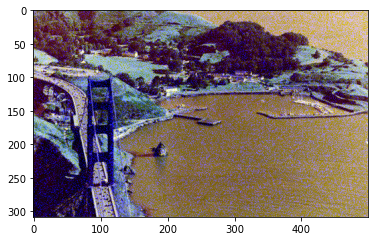

In [21]:
plt.imshow(image)

In [22]:
b,g,r=cv2.split(image)

In [23]:
rgb_image=cv2.merge([r,g,b])

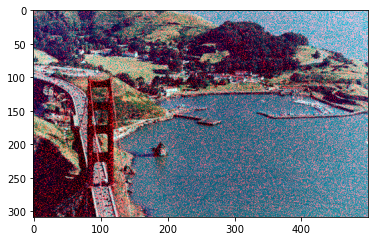

In [24]:
plt.imshow(rgb_image)

### Non Local means denoising

In [25]:
de_noised=cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

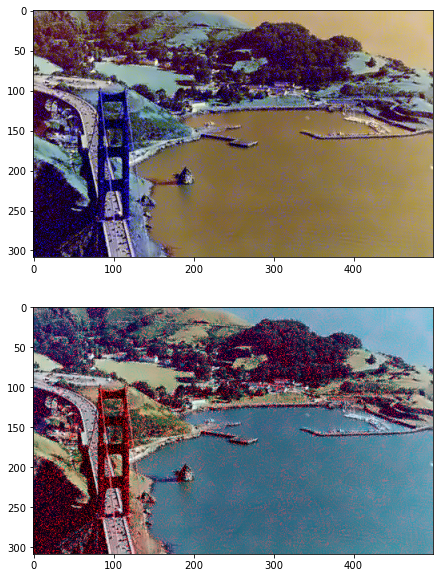

In [37]:
b,g,r = cv2.split(de_noised)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])
# switch it to rgb
fig, ax = plt.subplots()
fig.set_size_inches(10, 10) 
plt.subplot(211),plt.imshow(de_noised)
plt.subplot(212),plt.imshow(rgb_dst)
 
plt.show()

### Median Filtering

In [38]:
path_mri=r"C:\Users\guest\Downloads\mri_noised.jpg"

In [41]:
mri_image=cv2.imread(path_mri)
np.shape(mri_image)

(537, 537, 3)

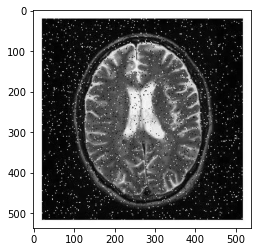

In [40]:
plt.imshow(mri_image)

In [42]:
median = cv2.medianBlur(mri_image, 5)

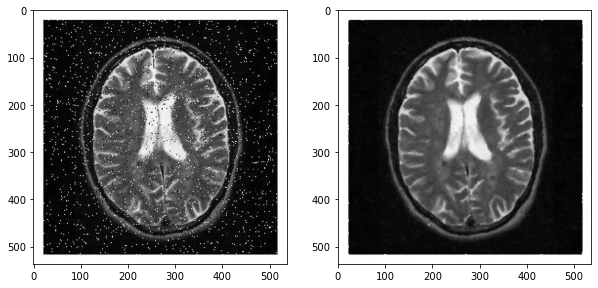

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Plot data in the first subplot
axs[0].imshow(mri_image)

# Plot data in the second subplot
axs[1].imshow(median)


# Show the plot
plt.show()

### Gaussian Filter

In [44]:
img_gaussian = cv2.GaussianBlur(src=mri_image, ksize=(5, 5), sigmaX=2, sigmaY=2)

### Applying non local means to the MRI

In [46]:
img_denoised = cv2.fastNlMeansDenoising(src=mri_image, templateWindowSize=7, searchWindowSize=21)

### Lets compare all the results

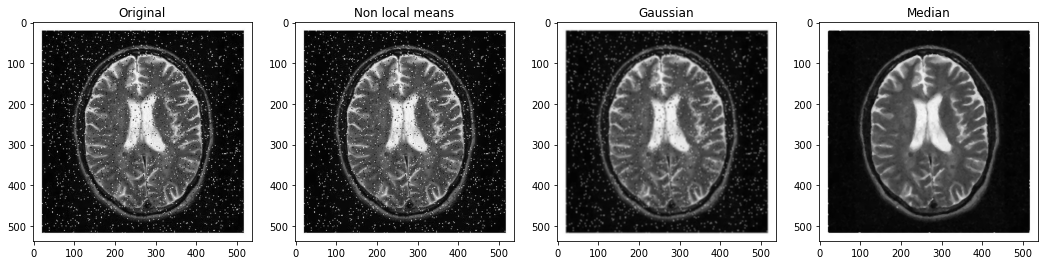

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Plot data in the first subplot
axs[0].imshow(mri_image)
axs[0].set_title("Original")

# Plot data in the second subplot
axs[1].imshow(img_denoised)
axs[1].set_title("Non local means")

# Plot data in the third subplot
axs[2].imshow(img_gaussian)
axs[2].set_title("Gaussian")
#plot 4thd
axs[3].imshow(median)
axs[3].set_title("Median")
# Show the plot
plt.show()

#### Here it can be seen that median filtering works very well. because the noise is salt and paper